In [1]:
import RLSystem

2024-03-15 17:52:43.417380: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-15 17:52:43.436790: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-15 17:52:43.436817: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-15 17:52:43.437362: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-15 17:52:43.441281: I tensorflow/core/platform/cpu_feature_guar

In [26]:
from importlib import reload
reload(RLSystem)
import numpy as np
import time

In [27]:
sd={'n_input_channels': 9, 'channels_of_interest_inds': [0, 1, 2, 3, 4, 5, 6, 7,8], 'n_timepoints_per_sample': 100, 'delay': 10, 'max_sfsystem_output': 1023, 'reward_formula_string': '(fbin_1_4_ch0+freq_30_ch0)/fbin_12_30_ch0', 'fbins': [[0, 1], [1, 4], [4, 8], [8, 12], [12, 30], [30,50]], 'device_address': 'ws://10.42.0.231:80/', 'step_stim_length_millis': 10000, 'episode_time_seconds': 60, 'n_total_timesteps': 'episode', 'num_episodes': 5, 'logfn': 'current_training.log', 'signal_plot_width': 2000, 'signal_plot_height': 1500, 'training_plot_width': 2000, 'training_plot_height': 500, 'render_each_step': True, 'render_data': True, 'log_steps': True, 'log_episodes': True, 'log_best_actions_every_episode': True, 'log_actions_every_step': True, 'log_best_actions_final': True, 'write_raw': True, 'write_fft': True, 'write_bins': True, 'log_model': True, 'log_or_plot_every_n_timesteps': 1, 'algorithm': 'A2C', 'n_steps_per_timestep': 1, 'use_raw_in_os_def': True, 'use_freq_in_os_def': True, 'use_fbins_in_os_def': True}
out_dict={'leddelay': {'names': ['leddelay'], 'value_range': {'min': 1, 'max': 100}, 'init_val': {'leddelay': 10}}, 'ledcontrols': {'names': ['lv1r', 'lv1g', 'lv1b', 'lv2r', 'lv2g', 'lv2b', 'lv3r', 'lv3g', 'lv3b', 'lv4r', 'lv4g', 'lv4b', 'lv5r', 'lv5g', 'lv5b', 'lv6r', 'lv6g', 'lv6b', 'lv7r', 'lv7g', 'lv7b', 'lv8r', 'lv8g', 'lv8b'], 'value_range': {'min': 10, 'max': 255}, 'init_val': {'lv1r': 255, 'lv1g': 0, 'lv1b': 0, 'lv2r': 0, 'lv2b': 0, 'lv3r': 0, 'lv3g': 0, 'lv3b': 255, 'lv4r': 255, 'lv4g': 255, 'lv4b': 255, 'lv5r': 0, 'lv5g': 255, 'lv5b': 255, 'lv6r': 255, 'lv6g': 0, 'lv6b': 255, 'lv7r': 255, 'lv7b': 0, 'lv8r': 255, 'lv8g': 0, 'lv8b': 0}}, 'sound_wave_frequencies': {'names': ['wave_1_freq', 'wave_2_freq'], 'value_range': {'min': 1, 'max': 30000}, 'init_val': {'wave_1_freq': 440, 'wave_2_freq': 440}}, 'panner_phasor_frequencies': {'names': ['panner_freq', 'phasor_1_freq', 'phasor_2_freq', 'phasor_1_min', 'phasor_2_min', 'phasor_1_dif', 'phasor_2_dif'], 'value_range': {'min': 1, 'max': 50}, 'init_val': {'panner_freq': 1, 'phasor_1_freq': 440, 'phasor_2_freq': 440, 'phasor_1_min': 1, 'phasor_2_min': 1, 'phasor_1_dif': 49, 'phasor_2_dif': 49}}, 'panner_div': {'names': ['panner_div'], 'value_range': {'min': 1, 'max': 5}, 'init_val': {'panner_div': 2}}, 'sound_wave_shapes': {'names': ['wave_1_type', 'wave_2_type'], 'value_range': {'min': 0, 'max': 3}, 'init_val': {'wave_1_type': 0, 'wave_2_type': 0}}, 'maxivolume': {'names': ['maxivolume'], 'value_range': {'min': 1, 'max': 25}, 'init_val': {'maxivolume': 10}}}

In [28]:
env = RLSystem.SFSystemCommunicator(out_dict=out_dict,
                                              n_input_channels=9,
                                              channels_of_interest_inds=sd['channels_of_interest_inds'],
                                              n_timepoints_per_sample=sd['n_timepoints_per_sample'],
                                              max_sfsystem_output=sd['max_sfsystem_output'],
                                              reward_formula_string=sd['reward_formula_string'],
                                              fbins=sd['fbins'],
                                              delay=sd['delay'],
                                              use_raw_in_os_def=sd['use_raw_in_os_def'],
                                              use_freq_in_os_def=sd['use_freq_in_os_def'],
                                              use_fbins_in_os_def=sd['use_fbins_in_os_def'],
                                              device_address=sd['device_address'],
                                              step_stim_length_millis=sd['step_stim_length_millis'],
                                              episode_time_seconds=sd['episode_time_seconds'],
                                              logfn=sd['logfn'],
                                              log_steps=sd['log_steps'],
                                              log_episodes=sd['log_episodes'],
                                              log_best_actions_final=sd['log_best_actions_final'],
                                              signal_plot_width=sd['signal_plot_width'],
                                              signal_plot_height=sd['signal_plot_height'],
                                              training_plot_width=sd['training_plot_width'],
                                              training_plot_height=sd['training_plot_height'],
                                              write_raw=sd['write_raw'],
                                              write_fft=sd['write_fft'],
                                              write_bins=sd['write_bins'],
                                              log_best_actions_every_episode=sd['log_best_actions_every_episode'],
                                              render_data=sd['render_data'],
                                              render_each_step=sd['render_each_step'],
                                              log_actions_every_step=sd['log_actions_every_step'])

Token freq_30_ch0:
Closest fft frequency 30.0
Connected
Delay and data transfer buffer size are set up.
Default actions are set.


In [29]:
env.step(env.action_space.sample())

[123, 97, 190, 169, 211, 36, 105, 175, 132, 161, 213, 47, 39, 13, 192, 59, 202, 252, 77, 212, 129, 192, 148, 144, 100, 1371, 5910, 22, 5, 44, 45, 15, 4, 24, 29, 15, 0, 0]
123,97,190,169,211,36,105,175,132,161,213,47,39,13,192,59,202,252,77,212,129,192,148,144,100,1371,5910,22,5,44,45,15,4,24,29,15,0,0


(OrderedDict([('raw_data',
               array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0],
                      [ 0,  0,  0,  0,  0,  0,  0,  0, 29],
                      [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
                      [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
                      [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
                      [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
                      [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
                      [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
                      [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
                      [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
                      [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
                      [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
                      [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
                      [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
                      [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
                      [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
             

In [30]:
env.render(jnb=True)

In [17]:
env.close()

In [16]:
while True:
    time.sleep(5)
    env.sample_observations(use_synth_data=False)
    print(np.mean(env.current_sample['ch9']))

0.16
0.12
-0.15
0.08
0.22
-0.18
0.19
0.0
0.0


KeyboardInterrupt: 

In [ ]:
env.

In [95]:
import json

In [ ]:
env.close()

In [94]:
def get_state_from_model_logfile(logfile=None):
    if str(logfile)=='None':
        logfile='model_stats.log'
    with open(logfile, 'r') as f:
        data = f.read()
    envdata=json.loads(data.split('\n')[0])
    return envdata

In [96]:
get_state_from_model_logfile(logfile='model_stats.log')

{'out_dict': {'leddelay': {'names': ['leddelay'],
   'value_range': {'min': 1, 'max': 100},
   'init_val': {'leddelay': 10}},
  'ledcontrols': {'names': ['lv1r',
    'lv1g',
    'lv1b',
    'lv2r',
    'lv2g',
    'lv2b',
    'lv3r',
    'lv3g',
    'lv3b',
    'lv4r',
    'lv4g',
    'lv4b',
    'lv5r',
    'lv5g',
    'lv5b',
    'lv6r',
    'lv6g',
    'lv6b',
    'lv7r',
    'lv7g',
    'lv7b',
    'lv8r',
    'lv8g',
    'lv8b'],
   'value_range': {'min': 10, 'max': 255},
   'init_val': {'lv1r': 255,
    'lv1g': 0,
    'lv1b': 0,
    'lv2r': 0,
    'lv2b': 0,
    'lv3r': 0,
    'lv3g': 0,
    'lv3b': 255,
    'lv4r': 255,
    'lv4g': 255,
    'lv4b': 255,
    'lv5r': 0,
    'lv5g': 255,
    'lv5b': 255,
    'lv6r': 255,
    'lv6g': 0,
    'lv6b': 255,
    'lv7r': 255,
    'lv7b': 0,
    'lv8r': 255,
    'lv8g': 0,
    'lv8b': 0}},
  'sound_wave_frequencies': {'names': ['wave_1_freq', 'wave_2_freq'],
   'value_range': {'min': 1, 'max': 30000},
   'init_val': {'wave_1_freq': 440, 'w

In [4]:
sd={'n_input_channels': 8, 'channels_of_interest_inds': [0, 1, 2, 3, 4, 5, 6, 7], 'n_timepoints_per_sample': 100, 'delay': 10, 'max_sfsystem_output': 1023, 'reward_formula_string': '(fbin_1_4_ch0+freq_30_ch0)/fbin_12_30_ch0', 'fbins': [[0, 1], [1, 4], [4, 8], [8, 12], [12, 30], [30,50]], 'device_address': 'ws://10.42.0.231:80/', 'step_stim_length_millis': 10000, 'episode_time_seconds': 60, 'n_total_timesteps': 'episode', 'num_episodes': 5, 'logfn': 'current_training.log', 'signal_plot_width': 2000, 'signal_plot_height': 1500, 'training_plot_width': 2000, 'training_plot_height': 500, 'render_each_step': True, 'render_data': True, 'log_steps': True, 'log_episodes': True, 'log_best_actions_every_episode': True, 'log_actions_every_step': True, 'log_best_actions_final': True, 'write_raw': True, 'write_fft': True, 'write_bins': True, 'log_model': True, 'log_or_plot_every_n_timesteps': 1, 'algorithm': 'A2C', 'n_steps_per_timestep': 1, 'use_raw_in_os_def': True, 'use_freq_in_os_def': True, 'use_fbins_in_os_def': True}
out_dict={'leddelay': {'names': ['leddelay'], 'value_range': {'min': 1, 'max': 100}, 'init_val': {'leddelay': 10}}, 'ledcontrols': {'names': ['lv1r', 'lv1g', 'lv1b', 'lv2r', 'lv2g', 'lv2b', 'lv3r', 'lv3g', 'lv3b', 'lv4r', 'lv4g', 'lv4b', 'lv5r', 'lv5g', 'lv5b', 'lv6r', 'lv6g', 'lv6b', 'lv7r', 'lv7g', 'lv7b', 'lv8r', 'lv8g', 'lv8b'], 'value_range': {'min': 10, 'max': 255}, 'init_val': {'lv1r': 255, 'lv1g': 0, 'lv1b': 0, 'lv2r': 0, 'lv2b': 0, 'lv3r': 0, 'lv3g': 0, 'lv3b': 255, 'lv4r': 255, 'lv4g': 255, 'lv4b': 255, 'lv5r': 0, 'lv5g': 255, 'lv5b': 255, 'lv6r': 255, 'lv6g': 0, 'lv6b': 255, 'lv7r': 255, 'lv7b': 0, 'lv8r': 255, 'lv8g': 0, 'lv8b': 0}}, 'sound_wave_frequencies': {'names': ['wave_1_freq', 'wave_2_freq'], 'value_range': {'min': 1, 'max': 30000}, 'init_val': {'wave_1_freq': 440, 'wave_2_freq': 440}}, 'panner_phasor_frequencies': {'names': ['panner_freq', 'phasor_1_freq', 'phasor_2_freq', 'phasor_1_min', 'phasor_2_min', 'phasor_1_dif', 'phasor_2_dif'], 'value_range': {'min': 1, 'max': 50}, 'init_val': {'panner_freq': 1, 'phasor_1_freq': 440, 'phasor_2_freq': 440, 'phasor_1_min': 1, 'phasor_2_min': 1, 'phasor_1_dif': 49, 'phasor_2_dif': 49}}, 'panner_div': {'names': ['panner_div'], 'value_range': {'min': 1, 'max': 5}, 'init_val': {'panner_div': 2}}, 'sound_wave_shapes': {'names': ['wave_1_type', 'wave_2_type'], 'value_range': {'min': 0, 'max': 3}, 'init_val': {'wave_1_type': 0, 'wave_2_type': 0}}, 'maxivolume': {'names': ['maxivolume'], 'value_range': {'min': 1, 'max': 25}, 'init_val': {'maxivolume': 10}}}

In [6]:
env = RLSystem.SFSystemCommunicator(out_dict=out_dict,
                                              n_input_channels=sd['n_input_channels'],
                                              channels_of_interest_inds=sd['channels_of_interest_inds'],
                                              n_timepoints_per_sample=sd['n_timepoints_per_sample'],
                                              max_sfsystem_output=sd['max_sfsystem_output'],
                                              reward_formula_string=sd['reward_formula_string'],
                                              fbins=sd['fbins'],
                                              delay=sd['delay'],
                                              use_raw_in_os_def=sd['use_raw_in_os_def'],
                                              use_freq_in_os_def=sd['use_freq_in_os_def'],
                                              use_fbins_in_os_def=sd['use_fbins_in_os_def'],
                                              device_address=sd['device_address'],
                                              step_stim_length_millis=sd['step_stim_length_millis'],
                                              episode_time_seconds=sd['episode_time_seconds'],
                                              logfn=sd['logfn'],
                                              log_steps=sd['log_steps'],
                                              log_episodes=sd['log_episodes'],
                                              log_best_actions_final=sd['log_best_actions_final'],
                                              signal_plot_width=sd['signal_plot_width'],
                                              signal_plot_height=sd['signal_plot_height'],
                                              training_plot_width=sd['training_plot_width'],
                                              training_plot_height=sd['training_plot_height'],
                                              write_raw=sd['write_raw'],
                                              write_fft=sd['write_fft'],
                                              write_bins=sd['write_bins'],
                                              log_best_actions_every_episode=sd['log_best_actions_every_episode'],
                                              render_data=sd['render_data'],
                                              render_each_step=sd['render_each_step'],
                                              log_actions_every_step=sd['log_actions_every_step'])

Token freq_30_ch0:
Closest fft frequency 30.0
Connected
Delay and data transfer buffer size are set up.
Default actions are set.


In [93]:
env.close()

WebSocketConnectionClosedException: socket is already closed.

In [90]:
trainer=RLSystem.stable_baselines_model_trainer(initialized_environment=env,
                                                          algorithm='A2C',
                                                          policy='MlpPolicy',
                                                          logfn='model_stats.log',
                                                          n_steps_per_timestep=2)

/home/biorp/.local/lib/python3.10/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning:

You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.



In [91]:
trainer.env_data

{'out_dict': {'leddelay': {'names': ['leddelay'],
   'value_range': {'min': 1, 'max': 100},
   'init_val': {'leddelay': 10}},
  'ledcontrols': {'names': ['lv1r',
    'lv1g',
    'lv1b',
    'lv2r',
    'lv2g',
    'lv2b',
    'lv3r',
    'lv3g',
    'lv3b',
    'lv4r',
    'lv4g',
    'lv4b',
    'lv5r',
    'lv5g',
    'lv5b',
    'lv6r',
    'lv6g',
    'lv6b',
    'lv7r',
    'lv7g',
    'lv7b',
    'lv8r',
    'lv8g',
    'lv8b'],
   'value_range': {'min': 10, 'max': 255},
   'init_val': {'lv1r': 255,
    'lv1g': 0,
    'lv1b': 0,
    'lv2r': 0,
    'lv2b': 0,
    'lv3r': 0,
    'lv3g': 0,
    'lv3b': 255,
    'lv4r': 255,
    'lv4g': 255,
    'lv4b': 255,
    'lv5r': 0,
    'lv5g': 255,
    'lv5b': 255,
    'lv6r': 255,
    'lv6g': 0,
    'lv6b': 255,
    'lv7r': 255,
    'lv7b': 0,
    'lv8r': 255,
    'lv8g': 0,
    'lv8b': 0}},
  'sound_wave_frequencies': {'names': ['wave_1_freq', 'wave_2_freq'],
   'value_range': {'min': 1, 'max': 30000},
   'init_val': {'wave_1_freq': 440, 'w

In [81]:
import json

In [76]:
input='model_stats.log'
with open(input, 'r') as f:
# Read the entire file as a string
    data = f.read()

In [83]:
modstats=json.loads(data.split('\n')[0])

In [84]:
modstats

{'out_dict': {'leddelay': {'names': ['leddelay'],
   'value_range': {'min': 1, 'max': 100},
   'init_val': {'leddelay': 10}},
  'ledcontrols': {'names': ['lv1r',
    'lv1g',
    'lv1b',
    'lv2r',
    'lv2g',
    'lv2b',
    'lv3r',
    'lv3g',
    'lv3b',
    'lv4r',
    'lv4g',
    'lv4b',
    'lv5r',
    'lv5g',
    'lv5b',
    'lv6r',
    'lv6g',
    'lv6b',
    'lv7r',
    'lv7g',
    'lv7b',
    'lv8r',
    'lv8g',
    'lv8b'],
   'value_range': {'min': 10, 'max': 255},
   'init_val': {'lv1r': 255,
    'lv1g': 0,
    'lv1b': 0,
    'lv2r': 0,
    'lv2b': 0,
    'lv3r': 0,
    'lv3g': 0,
    'lv3b': 255,
    'lv4r': 255,
    'lv4g': 255,
    'lv4b': 255,
    'lv5r': 0,
    'lv5g': 255,
    'lv5b': 255,
    'lv6r': 255,
    'lv6g': 0,
    'lv6b': 255,
    'lv7r': 255,
    'lv7b': 0,
    'lv8r': 255,
    'lv8g': 0,
    'lv8b': 0}},
  'sound_wave_frequencies': {'names': ['wave_1_freq', 'wave_2_freq'],
   'value_range': {'min': 1, 'max': 30000},
   'init_val': {'wave_1_freq': 440, 'w

In [ ]:
def read_model_logfile(logfn)

In [75]:
import pandas as pd

In [40]:
trainer.load_model('best_overall_reward_model.zip')

In [41]:
trainer.no_training_model_run()

[255, 0, 0, 0, 42, 0, 0, 0, 255, 255, 255, 255, 0, 255, 255, 255, 0, 255, 255, 250, 0, 255, 0, 0, 10, 440, 440, 1, 2, 440, 1, 49, 440, 1, 49, 10, 0, 0]
255,0,0,0,42,0,0,0,255,255,255,255,0,255,255,255,0,255,255,250,0,255,0,0,10,440,440,1,2,440,1,49,440,1,49,10,0,0
[138.4424403309822, 124.5510958135128, 139.80554103851318, 140.6298005580902, 140.38353323936462, 139.61152374744415, 140.25324404239655, 139.9644523859024, 124.63485941290855, 126.8692198395729, 140.6295084953308, 140.76385736465454, 124.49521690607071, 124.57957193255424, 140.54167062044144, 140.28953284025192, 139.6722435951233, 123.93574878573418, 139.2077761888504, 124.17306438088417, 124.64347526431084, 139.62155610322952, 124.37772735953331, 124.09011125564575, 47.31272432208061, 16065.412345290184, 15841.281914293766, 23.880928188562393, 2.876176953315735, 23.809965699911118, 23.939073503017426, 27.036635637283325, 27.15800815820694, 23.796324908733368, 24.293258011341095, 13.819000720977783, 1.396243929862976, 1.5982

In [42]:
trainer.env.close()

In [15]:
trainer.dynamic_launch()

[37.73528724908829, 224.54868972301483, 130.03612205386162, 50.64240217208862, 233.88463646173477, 181.85187429189682, 172.25359678268433, 236.10421121120453, 100.1171837747097, 114.15146380662918, 193.72041404247284, 115.02310320734978, 244.46252167224884, 219.5751529932022, 201.6594684123993, 183.14009010791779, 210.3464663028717, 185.45944809913635, 19.507840275764465, 65.53768321871758, 82.55119323730469, 165.09998679161072, 189.89147126674652, 120.66817253828049, 29.0343359708786, 10580.67264777422, 14374.204508632421, 26.696078777313232, 2.1812262535095215, 28.337191104888916, 8.98550695180893, 14.250910758972168, 9.53232291340828, 5.648097038269043, 42.035746455192566, 6.348744630813599, 1.184200644493103, 1.174378126859665]
37,224,130,50,233,181,172,236,100,114,193,115,244,219,201,183,210,185,19,65,82,165,189,120,29,10580,14374,26,2,28,8,14,9,5,42,6,1,1


In [23]:
trainer.static_launch()

[255, 0, 0, 0, 107, 0, 0, 0, 255, 255, 255, 255, 0, 255, 255, 255, 0, 255, 255, 24, 0, 255, 0, 0, 10, 440, 440, 1, 2, 440, 1, 49, 440, 1, 49, 10, 0, 0]
255,0,0,0,107,0,0,0,255,255,255,255,0,255,255,255,0,255,255,24,0,255,0,0,10,440,440,1,2,440,1,49,440,1,49,10,0,0


In [132]:
trainer.env.action_space

Box(-1.0, 1.0, (38,), float32)

In [133]:
trainer.env.action_space.sample()

array([-0.2563431 , -0.32272372,  0.2055059 ,  0.25758225, -0.6767539 ,
       -0.29601505, -0.15126814, -0.6863118 , -0.11512566, -0.32938278,
        0.97094345,  0.8469327 , -0.3576547 , -0.28550586,  0.04247129,
        0.8956824 ,  0.7959811 , -0.01473116,  0.24083948,  0.7983203 ,
        0.24649554, -0.6973428 ,  0.14983971,  0.7582619 ,  0.3552442 ,
       -0.6117365 ,  0.46261513, -0.8492093 ,  0.13925077,  0.23220345,
       -0.41340008,  0.7191646 , -0.04941723, -0.7914214 ,  0.5314542 ,
        0.8642335 , -0.65000075, -0.07796077], dtype=float32)

In [135]:
res=trainer.env.step(trainer.env.action_space.sample())

[173.20912390947342, 100.21237432956696, 51.36457845568657, 46.56760096549988, 157.72033482789993, 253.72263431549072, 110.5323389172554, 153.2065486907959, 226.37305974960327, 176.74655884504318, 172.50748693943024, 195.0515192747116, 127.053482234478, 70.72391465306282, 71.91187262535095, 66.466304063797, 91.91785767674446, 64.5831198990345, 25.932111144065857, 223.66016179323196, 136.10903412103653, 48.72679904103279, 184.41897451877594, 113.33859473466873, 68.43696165084839, 28048.323481857777, 11321.691335171461, 48.82400929927826, 1.127994179725647, 34.655781984329224, 25.808318972587585, 7.856333911418915, 33.82100236415863, 27.572786927223206, 34.27126383781433, 18.689464569091797, 2.243101716041565, 2.638328790664673]
173,100,51,46,157,253,110,153,226,176,172,195,127,70,71,66,91,64,25,223,136,48,184,113,68,28048,11321,48,1,34,25,7,33,27,34,18,2,2


In [138]:
res[0].shape

(1256,)

In [118]:
env.close()

In [7]:
sd2={'num_episodes': 1, 'log_model': True, 'n_total_timesteps': 'episode', 'log_or_plot_every_n_timesteps': 1, 'jnb': False}

trainer.train(num_episodes=sd2['num_episodes'], log_model=sd2['log_model'],n_total_timesteps=2, #sd2['n_total_timesteps'],
                 log_or_plot_every_n_timesteps=sd2['log_or_plot_every_n_timesteps'], jnb=False)

[255, 0, 0, 0, 243, 0, 0, 0, 255, 255, 255, 255, 0, 255, 255, 255, 0, 255, 255, 96, 0, 255, 0, 0, 10, 440, 440, 1, 2, 440, 1, 49, 440, 1, 49, 10, 0, 0]
255,0,0,0,243,0,0,0,255,255,255,255,0,255,255,255,0,255,255,96,0,255,0,0,10,440,440,1,2,440,1,49,440,1,49,10,0,0


UnboundLocalError: local variable 'new_observations' referenced before assignment

In [8]:
env.close()

In [94]:
env.step(env.action_space.sample())

[79, 145, 178, 226, 253, 80, 133, 34, 205, 247, 14, 183, 151, 197, 248, 241, 219, 224, 142, 174, 165, 73, 142, 159, 95, 7109, 29359, 27, 4, 18, 18, 15, 40, 27, 24, 21, 0, 0]
79,145,178,226,253,80,133,34,205,247,14,183,151,197,248,241,219,224,142,174,165,73,142,159,95,7109,29359,27,4,18,18,15,40,27,24,21,0,0


(OrderedDict([('raw_data',
               array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
                        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
                        0.00000000e+00,  0.00000000e+00],
                      [ 9.51056516e-01,  9.51056516e-01,  9.51056516e-01,
                        9.51056516e-01,  9.51056516e-01,  9.51056516e-01,
                        9.51056516e-01,  9.51056516e-01],
                      [-5.87785252e-01, -5.87785252e-01, -5.87785252e-01,
                       -5.87785252e-01, -5.87785252e-01, -5.87785252e-01,
                       -5.87785252e-01, -5.87785252e-01],
                      [-5.87785252e-01, -5.87785252e-01, -5.87785252e-01,
                       -5.87785252e-01, -5.87785252e-01, -5.87785252e-01,
                       -5.87785252e-01, -5.87785252e-01],
                      [ 9.51056516e-01,  9.51056516e-01,  9.51056516e-01,
                        9.51056516e-01,  9.51056516e-01,  9.51056516e-01,
 

In [95]:
wrapped_env= RLSystem.FlattenObservation(env)
wrapped_env = RLSystem.FlattenActionSpaceWrapper(wrapped_env)

In [96]:
env.step(env.action_space.sample())

[10, 24, 218, 52, 213, 198, 134, 98, 47, 64, 39, 100, 108, 45, 199, 173, 76, 87, 52, 191, 91, 167, 42, 37, 80, 16124, 26402, 41, 4, 44, 26, 15, 33, 23, 14, 21, 1, 0]
10,24,218,52,213,198,134,98,47,64,39,100,108,45,199,173,76,87,52,191,91,167,42,37,80,16124,26402,41,4,44,26,15,33,23,14,21,1,0


(OrderedDict([('raw_data',
               array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
                        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
                        0.00000000e+00,  0.00000000e+00],
                      [ 9.51056516e-01,  9.51056516e-01,  9.51056516e-01,
                        9.51056516e-01,  9.51056516e-01,  9.51056516e-01,
                        9.51056516e-01,  9.51056516e-01],
                      [-5.87785252e-01, -5.87785252e-01, -5.87785252e-01,
                       -5.87785252e-01, -5.87785252e-01, -5.87785252e-01,
                       -5.87785252e-01, -5.87785252e-01],
                      [-5.87785252e-01, -5.87785252e-01, -5.87785252e-01,
                       -5.87785252e-01, -5.87785252e-01, -5.87785252e-01,
                       -5.87785252e-01, -5.87785252e-01],
                      [ 9.51056516e-01,  9.51056516e-01,  9.51056516e-01,
                        9.51056516e-01,  9.51056516e-01,  9.51056516e-01,
 

In [97]:
trainer=RLSystem.stable_baselines_model_trainer(initialized_environment=env,
                                                          algorithm='PPO',
                                                          policy='MlpPolicy',
                                                          logfn='model_stats.log',
                                                          n_steps_per_timestep=2)

/home/biorp/.local/lib/python3.10/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning:

You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.

/home/biorp/.local/lib/python3.10/site-packages/stable_baselines3/ppo/ppo.py:155: UserWarning:

You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 2`, after every 0 untruncated mini-batches, there will be a truncated mini-batch of size 2
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=2 and n_envs=1)



In [98]:
sd2={'num_episodes': 1, 'log_model': True, 'n_total_timesteps': 'episode', 'log_or_plot_every_n_timesteps': 1, 'jnb': False}

trainer.train(num_episodes=sd2['num_episodes'], log_model=sd2['log_model'],n_total_timesteps=2, #sd2['n_total_timesteps'],
                 log_or_plot_every_n_timesteps=sd2['log_or_plot_every_n_timesteps'], jnb=False)

[255, 0, 0, 0, 180, 0, 0, 0, 255, 255, 255, 255, 0, 255, 255, 255, 0, 255, 255, 15, 0, 255, 0, 0, 10, 440, 440, 1, 2, 440, 1, 49, 440, 1, 49, 10, 0, 0]
255,0,0,0,180,0,0,0,255,255,255,255,0,255,255,255,0,255,255,15,0,255,0,0,10,440,440,1,2,440,1,49,440,1,49,10,0,0
[0.4965278, 0.49014455, 0.26404753, -0.9619765, 1.0, -0.27713594, 0.9036476, -1.0, -0.04646215, 1.0, -0.57344335, -0.45032436, -0.19467962, 1.0, -1.0, -0.12566246, 0.41311267, 1.0, 1.0, -0.86183596, 0.49786505, -0.24034674, 0.9391116, -0.14344169, 0.1920244, 1.0, -0.40890962, 1.0, 0.032054022, -0.8257742, 0.77733415, 0.3293386, 0.6139202, 0.39258578, 1.0, -0.11418468, -1.0, -1.0]
0,0,0,0,1,0,0,-1,0,1,0,0,0,1,-1,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,-1,-1
[-1.0, 0.20954262, 0.07139504, -0.45225158, -1.0, -1.0, 0.7054772, 0.047031544, 0.48128018, 0.19606665, -0.46316028, -1.0, 0.9472068, -1.0, 0.5887848, 0.083143026, -0.5493856, 0.23341493, -1.0, 0.38518944, 0.7039911, 1.0, -0.1675186, -1.0, -0.907039, -0.06828914, -1.0, -1

KeyboardInterrupt: 

In [11]:
env.out_order

['lv1r',
 'lv1g',
 'lv1b',
 'lv2r',
 'lv2g',
 'lv2b',
 'lv3r',
 'lv3g',
 'lv3b',
 'lv4r',
 'lv4g',
 'lv4b',
 'lv5r',
 'lv5g',
 'lv5b',
 'lv6r',
 'lv6g',
 'lv6b',
 'lv7r',
 'lv7g',
 'lv7b',
 'lv8r',
 'lv8g',
 'lv8b',
 'leddelay',
 'wave_1_freq',
 'wave_2_freq',
 'panner_freq',
 'panner_div',
 'phasor_1_freq',
 'phasor_1_min',
 'phasor_1_dif',
 'phasor_2_freq',
 'phasor_2_min',
 'phasor_2_dif',
 'maxivolume',
 'wave_1_type',
 'wave_2_type']

In [9]:
env.close()

In [136]:
import numpy as np

In [ ]:
env.step(env.default_actions)

In [142]:
env.stop_audiovis_feedback()

In [140]:
env.step(env.action_space.sample())

OrderedDict([('leddelay', array([59])), ('lv1r', array([177])), ('lv1g', array([60])), ('lv1b', array([16])), ('lv2r', array([63])), ('lv2g', array([217])), ('lv2b', array([200])), ('lv3r', array([37])), ('lv3g', array([80])), ('lv3b', array([196])), ('lv4r', array([37])), ('lv4g', array([78])), ('lv4b', array([154])), ('lv5r', array([100])), ('lv5g', array([209])), ('lv5b', array([253])), ('lv6r', array([30])), ('lv6g', array([10])), ('lv6b', array([215])), ('lv7r', array([172])), ('lv7g', array([243])), ('lv7b', array([225])), ('lv8r', array([158])), ('lv8g', array([101])), ('lv8b', array([144])), ('wave_1_freq', array([13973])), ('wave_2_freq', array([24204])), ('panner_freq', array([9])), ('phasor_1_freq', array([6])), ('phasor_2_freq', array([42])), ('phasor_1_min', array([32])), ('phasor_2_min', array([14])), ('phasor_1_dif', array([3])), ('phasor_2_dif', array([34])), ('panner_div', array([2])), ('wave_1_type', array([3])), ('wave_2_type', array([1])), ('maxivolume', array([21])

(OrderedDict([('raw_data',
               array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
                        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
                        0.00000000e+00,  0.00000000e+00],
                      [ 9.51056516e-01,  9.51056516e-01,  9.51056516e-01,
                        9.51056516e-01,  9.51056516e-01,  9.51056516e-01,
                        9.51056516e-01,  9.51056516e-01],
                      [-5.87785252e-01, -5.87785252e-01, -5.87785252e-01,
                       -5.87785252e-01, -5.87785252e-01, -5.87785252e-01,
                       -5.87785252e-01, -5.87785252e-01],
                      [-5.87785252e-01, -5.87785252e-01, -5.87785252e-01,
                       -5.87785252e-01, -5.87785252e-01, -5.87785252e-01,
                       -5.87785252e-01, -5.87785252e-01],
                      [ 9.51056516e-01,  9.51056516e-01,  9.51056516e-01,
                        9.51056516e-01,  9.51056516e-01,  9.51056516e-01,
 

In [14]:
import numpy as np

In [15]:
res=env.sample_and_process_observations_from_device()

In [16]:
env.raw_data.shape

(100, 8)

In [19]:
res['fft'][0].argmax()

30

In [20]:
import matplotlib.pyplot as plt

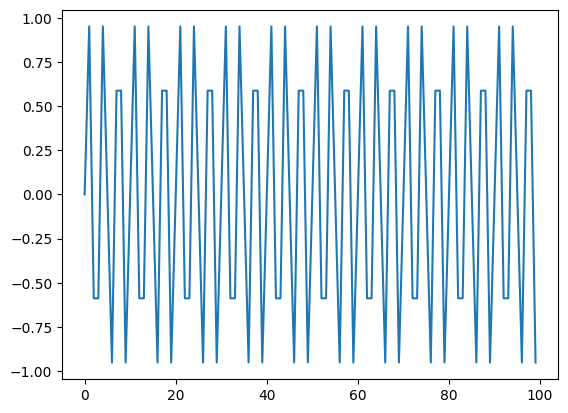

In [21]:
plt.plot(env.raw_data[:,1])

In [52]:
env.timesteps.shape

(100,)

In [22]:
env.close()

In [ ]:
env.step(env.action_space.sample())

In [32]:
env.reset()

KeyError: 'lv1r'

In [33]:
env.close()

In [88]:
trainer=RLSystem.stable_baselines_model_trainer(initialized_environment=env,
                                                          algorithm=sd['algorithm'],
                                                          policy='MlpPolicy',
                                                          logfn='model_stats.log',
                                                          n_steps_per_timestep=sd['n_steps_per_timestep'])
sd2={'num_episodes': 5, 'log_model': True, 'n_total_timesteps': 'episode', 'log_or_plot_every_n_timesteps': 1, 'jnb': False}

trainer.train(num_episodes=sd2['num_episodes'], log_model=sd2['log_model'],n_total_timesteps=sd2['n_total_timesteps'],
                 log_or_plot_every_n_timesteps=sd2['log_or_plot_every_n_timesteps'], jnb=False)

/home/biorp/.local/lib/python3.10/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning:

You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.



255,0,0,0,71,0,0,0,255,255,255,255,0,255,255,255,0,255,255,81,0,255,0,0,10,440,440,1,2,440,1,49,440,1,49,10,0,0
0,0,1,0,0,0,0,1,0,1,0,0,-1,0,-1,1,0,0,0,0,-1,1,0,0,0,1,-1,1,0,0,0,-1,0,0,-1,0,-1,-1
255,0,0,0,71,0,0,0,255,255,255,255,0,255,255,255,0,255,255,81,0,255,0,0,10,440,440,1,2,440,1,49,440,1,49,10,0,0
0,1,-1,1,0,0,-1,-1,1,0,0,0,0,0,1,0,0,0,0,1,0,-1,1,0,-1,1,0,0,0,0,0,0,0,0,0,0,1,0
255,0,0,0,71,0,0,0,255,255,255,255,0,255,255,255,0,255,255,81,0,255,0,0,10,440,440,1,2,440,1,49,440,1,49,10,0,0
-1,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,1,-1,0,0,1,0,0,0,0,0,1,0,-1
255,0,0,0,71,0,0,0,255,255,255,255,0,255,255,255,0,255,255,81,0,255,0,0,10,440,440,1,2,440,1,49,440,1,49,10,0,0
-1,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,1,0,0,0,0,0,1,0,-1,0,1,0,0,0,0,-1,0,0,0,0,0,-1,1


KeyboardInterrupt: 

In [94]:
env.close()

In [8]:
env.raw_data[:10]

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

In [24]:
synthesized_data=env.synth_data()

In [25]:
synthesized_data

array([ 0.00000000e+00, -1.01900517e-13, -2.03801035e-13, -3.05701552e-13,
       -4.07602070e-13, -5.09502587e-13, -6.11403104e-13, -7.13303622e-13,
       -8.15204139e-13, -2.73609406e-12, -1.01900517e-12, -2.93989509e-12,
       -1.22280621e-12, -3.14369613e-12, -1.42660724e-12, -3.34749716e-12,
       -1.63040828e-12, -3.55129820e-12, -5.47218812e-12, -3.75509923e-12,
       -2.03801035e-12, -7.59687908e-12, -5.87979019e-12, -4.16270130e-12,
       -2.44561242e-12, -8.00448115e-12, -6.28739226e-12, -4.57030337e-12,
       -2.85321449e-12, -8.41208321e-12, -6.69499433e-12, -4.97790544e-12,
       -3.26081656e-12, -8.81968528e-12, -7.10259640e-12, -5.38550751e-12,
       -1.09443762e-11, -1.95132974e-12, -7.51019847e-12, -1.30690672e-11,
       -4.07602070e-12, -9.63488942e-12, -1.51937582e-11, -6.20071165e-12,
       -1.17595804e-11, -2.76653388e-12, -8.32540261e-12, -1.38842713e-11,
       -4.89122483e-12, -1.04500936e-11, -1.60089623e-11, -7.01591579e-12,
       -1.25747845e-11, -

In [12]:
env.timesteps

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
       110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
       220., 230., 240., 250., 260., 270., 280., 290., 300., 310., 320.,
       330., 340., 350., 360., 370., 380., 390., 400., 410., 420., 430.,
       440., 450., 460., 470., 480., 490., 500., 510., 520., 530., 540.,
       550., 560., 570., 580., 590., 600., 610., 620., 630., 640., 650.,
       660., 670., 680., 690., 700., 710., 720., 730., 740., 750., 760.,
       770., 780., 790., 800., 810., 820., 830., 840., 850., 860., 870.,
       880., 890., 900., 910., 920., 930., 940., 950., 960., 970., 980.,
       990.])

In [9]:
env.sample_observations(use_synth_data=True)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
env.

In [7]:
trainer=RLSystem.stable_baselines_model_trainer(initialized_environment=env,
                                                          algorithm=sd['algorithm'],
                                                          policy='MlpPolicy',
                                                          logfn='model_stats.log',
                                                          n_steps_per_timestep=sd['n_steps_per_timestep'])

/home/biorp/.local/lib/python3.10/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning:

You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.



In [8]:
sd2={'num_episodes': 5, 'log_model': True, 'n_total_timesteps': 'episode', 'log_or_plot_every_n_timesteps': 1, 'jnb': False}

trainer.train(num_episodes=sd2['num_episodes'], log_model=sd2['log_model'],n_total_timesteps=sd2['n_total_timesteps'],
                 log_or_plot_every_n_timesteps=sd2['log_or_plot_every_n_timesteps'], jnb=False)

KeyboardInterrupt: 

In [75]:
trainer.close_env()

TypeError: 'NoneType' object is not iterable

In [76]:
env.close()

TypeError: 'NoneType' object is not iterable

In [63]:
trainer.train(num_episodes=sd['num_episodes'], log_model=sd['log_model'],n_total_timesteps=sd['n_total_timesteps'],
                        log_or_plot_every_n_timesteps=sd['log_or_plot_every_n_timesteps'], jnb=False)

In [64]:
sd['num_episodes']

5

In [65]:
sd['log_model']

True

In [66]:
sd['n_total_timesteps']

0

In [50]:
env.step(env.action_space.sample())

(OrderedDict([('raw_data',
               array([[0, 0, 0, 0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0, 0, 0, 0],
             

In [51]:
env.close()

In [3]:
env = RLSystem.SFSystemCommunicator(step_stim_length_millis=1000, episode_time_seconds=2, render_each_step=True)

Token freq_30_ch0:
Closest fft frequency 30.0
Connected
Delay and data transfer buffer size are set up.
Default actions are set.


In [4]:
trainer=RLSystem.stable_baselines_model_trainer(initialized_environment=env)

/home/biorp/.local/lib/python3.10/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning:

You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.



In [5]:
trainer.train(num_episodes=2)